In [1]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from matplotlib import pyplot as plt
import pandas as pd
import os
import scipy.cluster.hierarchy as sch

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

In [3]:
results_folder = r'../example/results/wards_dendogram'
stations_parquet_file = r'stations_with_stats.parquet'

if not os.path.exists(results_folder):
    os.mkdir(results_folder)

df = pd.read_parquet(stations_parquet_file)

In [4]:
# Possible columns
# 'StationId', 'Name', 'Latitude', 'Longitude', 'Elevation', 'Series Start', 'Series end', 
# 'Min day IR', 'Max day IR', 'Yearly rainfall', 'Number of days with rainfall over 0.2 mm'

df_all = df.set_index('Name')[['Latitude', 'Longitude', 'Elevation', 'Yearly rainfall', 'Number of days with rainfall over 0.2 mm']]
df_spacial = df.set_index('Name')[['Latitude', 'Longitude', 'Elevation']]
df_only_rain_data = df.set_index('Name')[['Yearly rainfall', 'Number of days with rainfall over 0.2 mm']]

In [5]:
df_all_t = df_all.transpose()
df_spacial_t = df_spacial.transpose()
df_only_rain_data_t = df_only_rain_data.transpose()

In [6]:
c_link_all = linkage(df_all, method='ward')
c_link_spacial = linkage(df_spacial, method='ward')
c_link_only_rain_data = linkage(df_only_rain_data, method='ward')

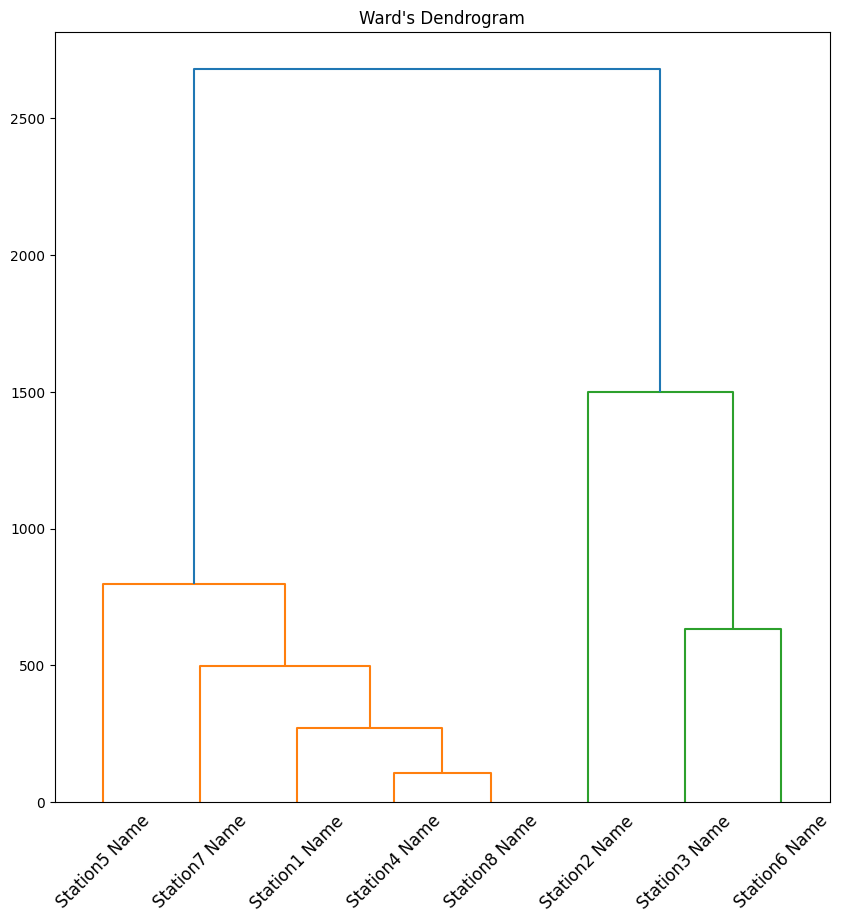

In [7]:
plt.figure(figsize=(10, 10))
B_all = dendrogram(c_link_all,labels=list(df_all_t.columns), leaf_rotation=45)
plt.title("Ward's Dendrogram")
#plt.show()

plt.savefig(os.path.join(results_folder, 'Ward_all.jpg'))



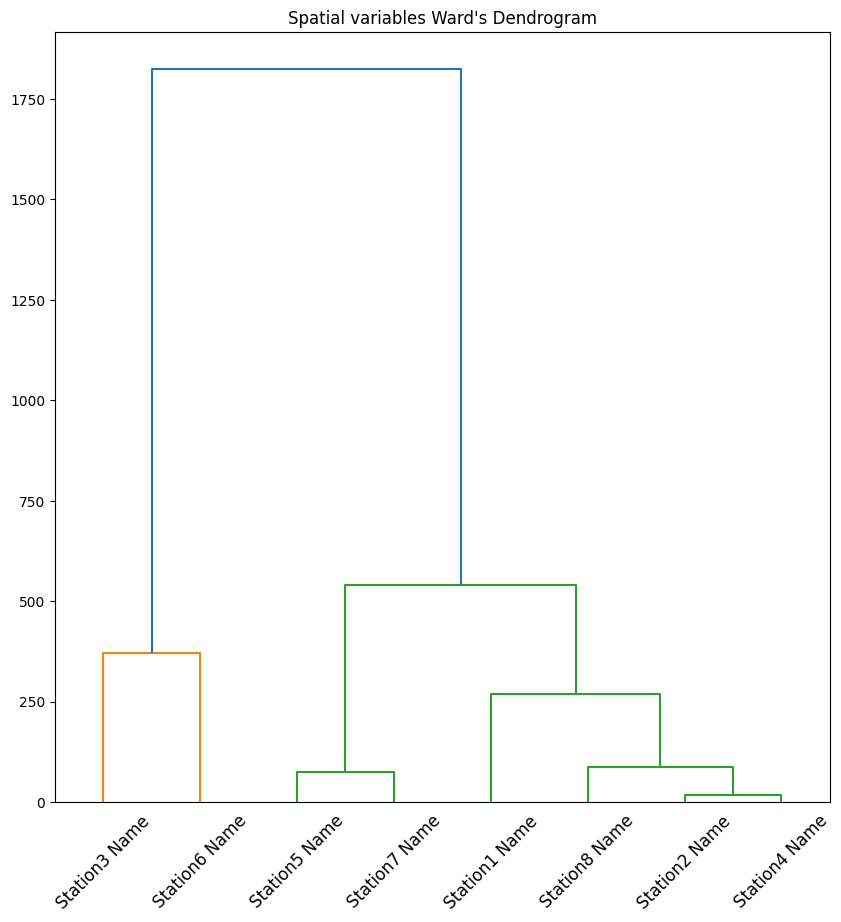

In [8]:
plt.figure(figsize=(10, 10))
B_spacial = dendrogram(c_link_spacial,labels=list(df_spacial_t.columns), leaf_rotation=45)
plt.title("Spatial variables Ward's Dendrogram")

plt.savefig(os.path.join(results_folder, 'Ward_spatial.jpg'))

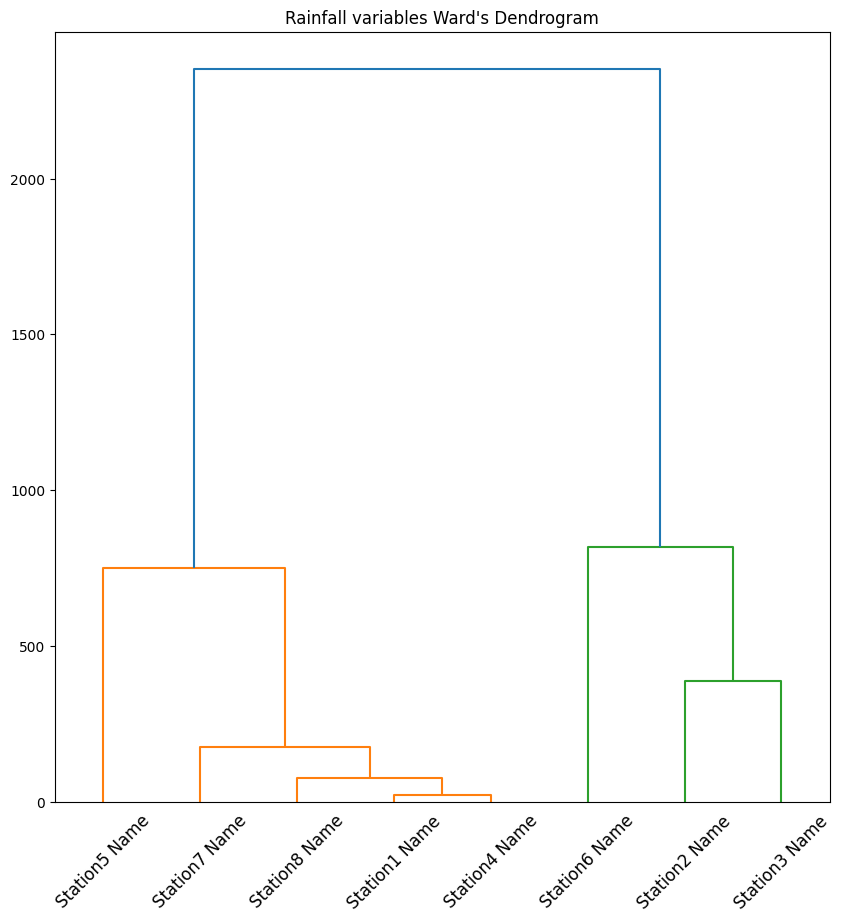

In [9]:
plt.figure(figsize=(10, 10))
B_only_rain_data = dendrogram(c_link_only_rain_data,labels=list(df_only_rain_data_t.columns), leaf_rotation=45)
plt.title("Rainfall variables Ward's Dendrogram")

plt.savefig(os.path.join(results_folder, 'Ward_rain.jpg'))